In [1]:
!pip3 show xgboost

Name: xgboost
Version: 2.1.4
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /Users/prince-mac/Library/Python/3.9/lib/python/site-packages
Requires: numpy, scipy
Required-by: 


<h2>ColumnTransformer</h2>

ColumnTransformer (from sklearn.compose) allows you to apply different preprocessing steps to different columns in your dataset, all in one object.

This is super useful when you have:

Numerical columns → you may want to scale them.

Categorical columns → you may want to encode them (one-hot, ordinal).

Text columns → you may want TF-IDF.

<h2>Pipeline</h2>
<list>
<ul>A Pipeline (from sklearn.pipeline) lets you chain together multiple steps (preprocessing + model) into a single workflow.</ul>
 <ul>Ensures data leakage prevention (preprocessing is always done inside cross-validation / training).</ul>
 <ul>Makes your code cleaner and more reproducible.</ul>
 <ul>Allows you to call .fit(), .predict(), .score() on the whole pipeline directly.</ul>

In [2]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("HR_dataset2.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [6]:
data.rename(columns={'Departments ':'departments'},inplace=True)
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

<b>  <h4>Shape of the dataset

In [7]:
data.shape

(14999, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<h3><b> Checking for missing values

In [10]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

<h3><b> Taking care of duplicate values

In [11]:
data.duplicated().any()

np.True_

In [12]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
data = data.drop_duplicates()
data.shape

(11991, 10)

In [14]:
14999 - 11991

3008

<Axes: xlabel='No=0 / Yes=1'>

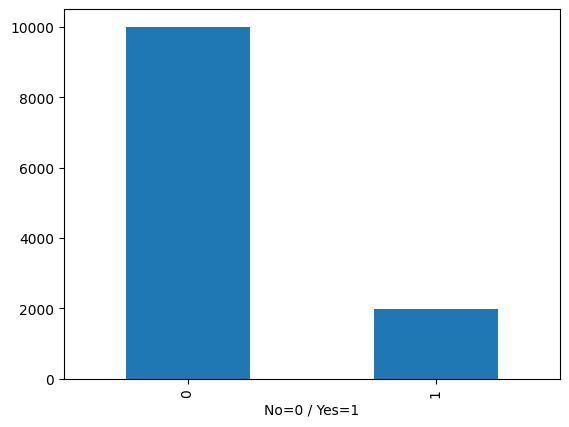

In [15]:
data['left'].value_counts().plot(kind='bar', xlabel='No=0 / Yes=1')

<h3><b>Store Feature Matrix in X and Response(target) in Vector Y

In [16]:
X = data.drop(columns = ['left'])   #independent columns 
y = data['left']     # dependent column or target variable

In [17]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [19]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [20]:
preprocessor = ColumnTransformer(transformers = [
    ('num',StandardScaler(),[
        'satisfaction_level',
        'last_evaluation',
        'number_project',
        'average_montly_hours',
        'time_spend_company',
        'Work_accident',
        'promotion_last_5years'
        ]),
        # one-hot encoding for the nominal categorical feature -- No inherent order
        ('nominal',OneHotEncoder(),['departments']),
        #ordinal encoding for the ordinal feature - inherent order (low(0),medium(1),high(2))
        ('ordinal',OrdinalEncoder(),['salary'])],
        remainder = 'passthrough'
    )

- <h3> Machine-Learning Pipeline

In [21]:
pipeline = Pipeline([('preprocessor',preprocessor),
('model',LogisticRegression()),
])

In [22]:
from sklearn import set_config

In [23]:
set_config(display='diagram')

In [24]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [25]:
data['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

- <h3> Splitting dataset into the Training and Testing Set

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)   #class distribution is preserved for Yes and No class


In [27]:
 #training of model with train_data using created pipeline
 pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [28]:
# predicting usitest data  Take the test data, pass it through the entire pipeline, and give me the predicted Yes/No labels
# y_pred is what you compare against the true labels y_test(acutal values of dataset).
y_pred = pipeline.predict(X_test)

#### Accuracy Score

In [29]:
print(f"Logistic regression accuracy_score: {round(accuracy_score(y_test,y_pred),2)} %")

Logistic regression accuracy_score: 0.84 %


In [30]:
print("y_test(actual)   :", y_test.values[:20])  # first 20 true labels
print("y_pred(predicted):", y_pred[:20])         # first 20 predictions


y_test(actual)   : [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
y_pred(predicted): [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Precision Score

In [31]:
print(f"Logistic regression precision_score: {round(precision_score(y_test,y_pred),2)} %")

Logistic regression precision_score: 0.52 %


#### Recall Score

In [32]:
print(f"Logistic regression recall_score: {round(recall_score(y_test,y_pred),2)} %")

Logistic regression recall_score: 0.22 %


~Reason behind low precision and recall of the model is <b> imbalanced dataset.

### <b >Building and evaluation of model

In [33]:
def model_scorer(model_name,model):

    output = []
    output.append(model_name)


    pipeline = Pipeline(
        [('preprocessor',preprocessor),
        ('model',model),
        ]
    )

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)   #class distribution is preserved for Yes and No class

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    output.append(round(accuracy_score(y_test,y_pred),2))
    output.append(round(precision_score(y_test,y_pred),2))
    output.append(round(recall_score(y_test,y_pred),2))

    return output
    

In [34]:
model_dict = {
    'log':LogisticRegression(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'XGB': XGBClassifier()
    }

In [35]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))


In [36]:
def print_results(model_output):
    df = pd.DataFrame(model_output, columns=["Model", "Accuracy", "Precision", "Recall"])
    print(df.to_string(index=False))

In [37]:
print_results(model_output)

        Model  Accuracy  Precision  Recall
          log      0.84       0.52    0.22
decision_tree      0.97       0.89    0.93
random_forest      0.99       0.99    0.92
          XGB      0.98       0.97    0.93


- <h3>As we can see here that our random forest model performs the better on our data handling the imbalance dataset well, and with high accuracy, precison and recall score.
- <h3>Decision Tree shows Strong balance. However, trees can easily overfit.
- <h3>XGBoost Often slightly better generalization than Random Forest, but can be more complex to tune.


In [38]:
pipeline = Pipeline([('preprocessor',preprocessor),
('model',RandomForestClassifier()),
])

In [39]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [40]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [41]:
sample = pd.DataFrame({
    'satisfaction_level': 0.38,
    'last_evaluation': 0.53,
    'number_project':2,
    "average_montly_hours":157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'departments':'sales',
    'salary':'low'
},index=[0])

In [42]:
result = pipeline.predict(sample)
if result == 1:
    print("An Employee may leave the organization")
else:
    print("Employee may continue working!")

An Employee may leave the organization


## Saving the model

In [43]:
import pickle

In [44]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)


In [45]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [46]:
result = pipeline_saved.predict(sample)
if result == 1:
    print("An Employee may leave the organization")
else:
    print("Employee may continue working!")

An Employee may leave the organization


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
